# Set up

## Mise en place de l'environnement 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from scipy import stats
from sklearn.linear_model import LinearRegression
import random as rd


import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/eda-prix-maison/eda-house-price")

## Import des données

In [2]:
df = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/ee654666-9d19-402e-9b80-5b70e4bcfe2d.csv")

# Etat des lieux de la donnée

## Affichage des 10 premières lignes

In [3]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Utilisation du .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Gestion des valeurs manquants

On va supprimer les colonnes pour lesquelles il manque plus de 30% des valeurs.

In [5]:
df.dropna(axis=1, thresh=0.3*len(df), inplace=True)

In [6]:
df.shape

(1460, 77)

On a supprimé 4 colonnes. 

## Gestion des doublons

On va regarder s'il y a des doublons.

In [7]:
print(df.duplicated().value_counts())

False    1460
dtype: int64


Il n'y a pas de doublons. On a donc pas besoin d'en supprimer.

## Analyse de SalePrice

### Analyse des valeurs

On va regarder les valeurs présentes dans SalePrice à l'aide d'un describe().

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

On peut voir que les prix des maisons s'étendent de 34.900 à 755.000 ce qui semble cohérent. 

### Représentation graphique

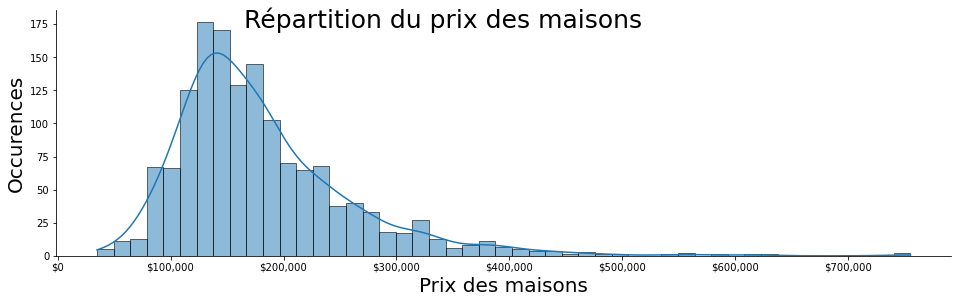

In [9]:
ax=sns.displot(x=df['SalePrice'], kde=True)

fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)
# Ajout du titre
fig.suptitle("Répartition du prix des maisons", fontsize=25)
# Ajout des labels pour les axes x et y
plt.xlabel("Prix des maisons", fontsize=20);
plt.ylabel("Occurences", fontsize=20, rotation=90);

# On garde en mémoire les limites en abscisse
left, right = plt.xlim()

# Modification du format des ticks en abscisse
ticks = ax.axes[0][0].get_xticks()
xlabels = ['$' + '{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(xlabels)

# On remet les limites précédentes en abscisse
plt.xlim(left, right);

In [10]:
stats.kurtosis(df['SalePrice'])

6.509812011089439

On constate qu'il y a peu de maisons en vente à partir de 500.000€. La répartition du prix des maisons s'approche d'une loi normale. L'ensemble des valeurs de ventes sont réparties de 35.000 à 780.000$ avec la majorité des valeurs entre 100.000 et 250.000$.
On constate que cette courbe a une asymétrie positive, la distribution est décalée à gauche de la médiane et on observe une queue de distribution étalée sur la droite.
Comme le kurtosis le montre, on a une distribution plutôt pointue en sa moyenne et a des queues de distribution épaisses. 

## Etude des variables quantitatives

### Histogrammes des variables quantitatives

On va commencer par faire un subset contenant toutes les colonnes contenant des variables quantitatives. (sauf la colonne Id qui ne donnera pas de graphiques exploitables) 

In [11]:
# Création de la liste des variables quantitatives
quanti=[]

# On parcourt les colonnes
for column in df.columns.difference(['Id']):
    # On ajoute les variables quantitatives à notre subset
    if df[column].dtype in ["int64", "float64"]:
        quanti.append(column)
    
print("Liste des variables quantitatives:\n\n{}".format(quanti))
print("\nNombre de variables quantitatives: {}".format(len(quanti)))

Liste des variables quantitatives:

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

Nombre de variables quantitatives: 37


On peut maintenant faire nos histogrammes

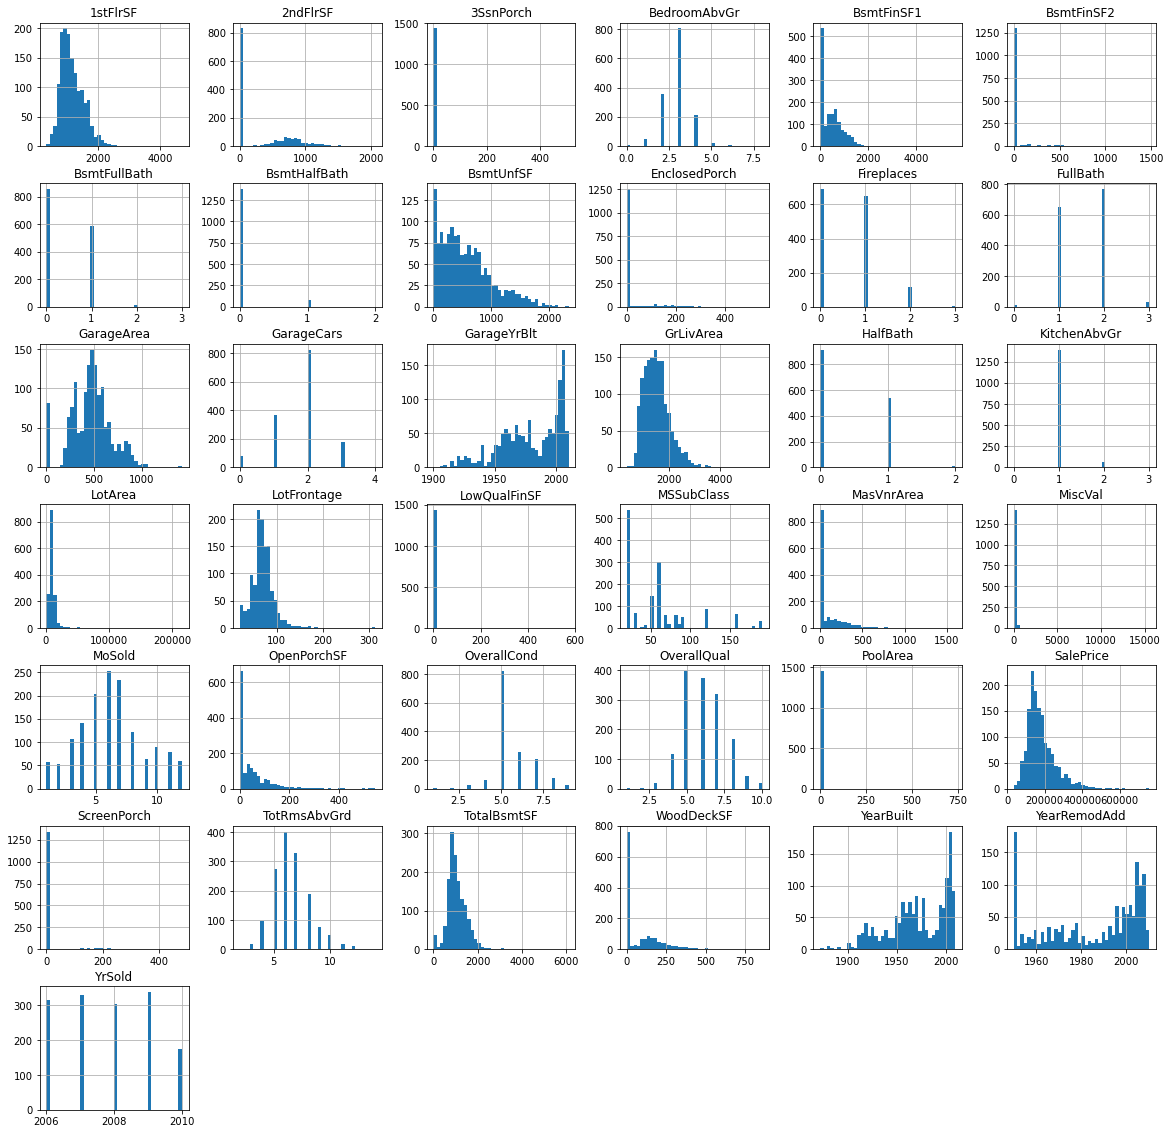

In [12]:
df[quanti].hist(figsize=(20,20), bins=40);

On constate que plusieurs variables ont des distributions semblables à celle du prix de vente des maisons. Ce sont des courbes avec une forte croissance dans les premières valeurs, un pic fort, et une décroissance plus lente et étalée.

Les colonnes en questions sont par exemple: 

1stFlrSF (superficie du rdc)
BedroomAbvGr (nombre de chambres en étage)
BsmtUnfSF (superficie unfinished du sous-sol)
GarageArea (superficie du garage)
GarageCars (nombre de voitures)
GrLiveArea (superficie en étage)
LotFrontage (longueur de rue connectée à la maison)
MsSubClass (type de logement)
MoSold (mois de vente)
TotalBsmtSF (superficie du sous-sol totale)
OverallQual (qualité globale)

On peut en conclure qu'il y a corrélation linéaire entre chacune des valeurs citées précédemment auxquelles on peut rajouter SalePrice. 

### Calcul des corrélations avec le prix de vente des maisons

In [13]:
# On travaille sur les valeur quantitatives (sauf SalePrice qui sera forcément correlée)
# On calcule la correlation avec SalePrice en triant les valeurs absolues pour ne conserver que les 10 plus grandes
listcorr = df.corrwith(df['SalePrice']).sort_values(ascending=False).abs().head(10).index
print(listcorr)
# [df[quanti].columns.difference(['SalePrice'])]

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


On a donc les 10 variables les plus correlées linéairement avec SalePrice (avec SalePrice inclus, son coefficient de corrélation avec lui-même sera évidemment de 1). 

### Représentation graphique des valeurs correlées

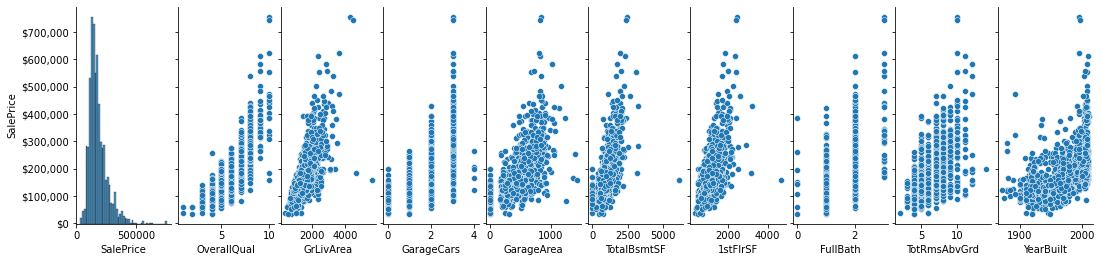

In [14]:
ax = sns.pairplot(data=df[listcorr],
                  y_vars= 'SalePrice');
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)

# on change le format de l'axe y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.axes[0][0].yaxis.set_major_formatter(tick) 

Pour les 3 variables les plus corrélées, on constate que plus la valeur en question augmente, plus le salaire moyene augmente. On pourrait tracer une droite croissante à partir de ces points.
Ces points se trouvent dans un cone centré autour d'une droite croissante.

### Visualisation des corrélations par heatmap

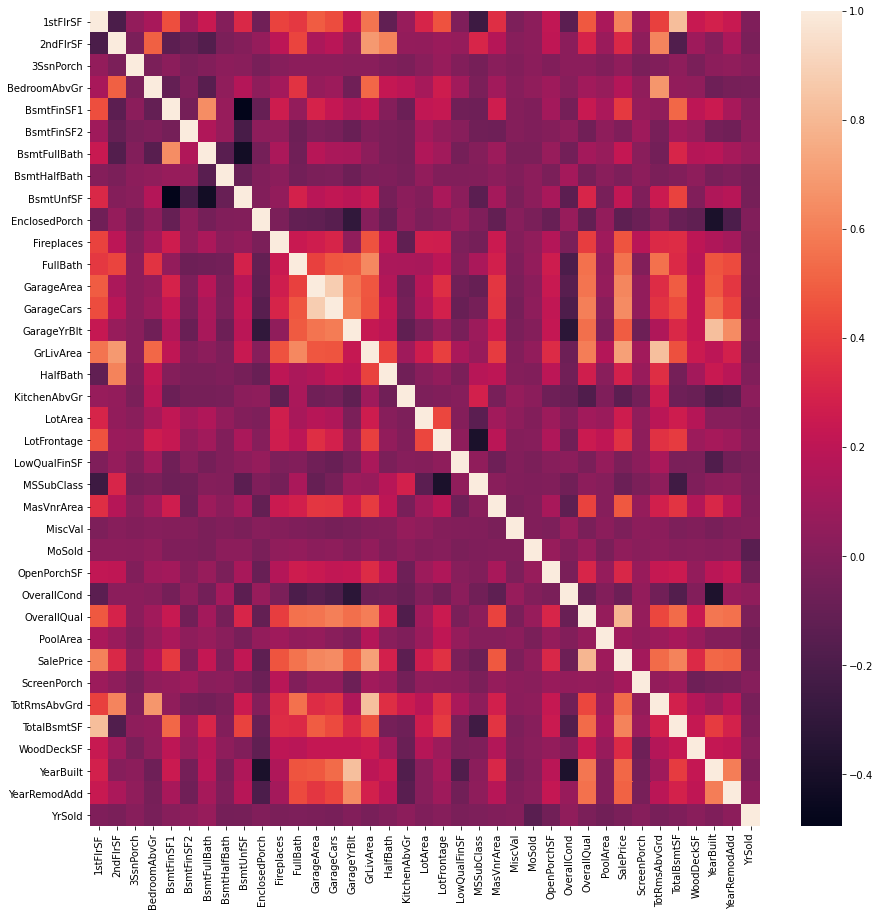

In [15]:
ax=sns.heatmap(df[quanti].corr(), xticklabels=True, yticklabels=True)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,15)

Les paires de variables les plus fortement correlées sont :
- GarageArea et GarageCars (La superficie du garage et le nombre de voitures) ce qui semble très cohérent qu'il y ait un lien entre la taille du garage et le nombre de voitures (la première valeur limitant la seconde)
- TotRmsAbvGrd et GrLivArea (Nombre de pièces à l'étage et superificie à l'étage) ce qui semble cohérent également, la superficie de l'étage limitant le nombre de pièces à l'étage. 
- YearBuilt et GarageYrBlt (Année de construction de la maison et du garage) ce qui est cohérent aussi, l'année de construction du garage est souvent très proche de celle de construction de la maison. 

Ces variables sont donc dépendantes l'une de l'autre. 

### Réalisation de regplot

On va tracer les regplot pour croiser les valeurs de ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']  avec SalePrice

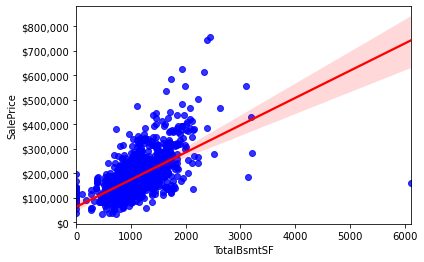

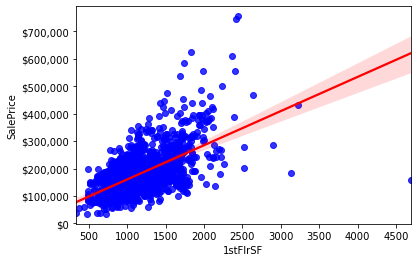

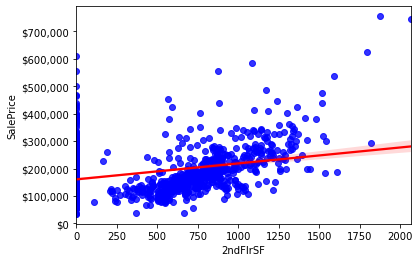

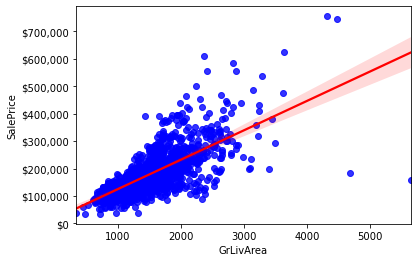

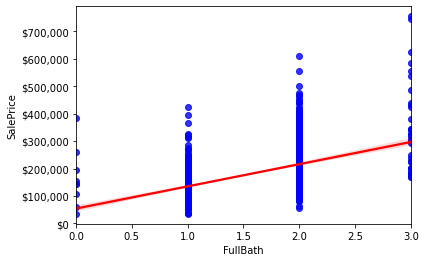

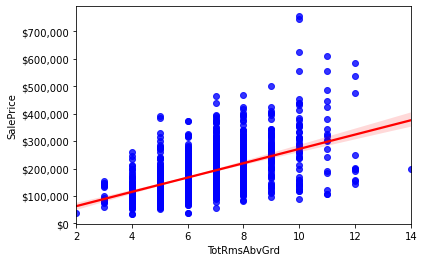

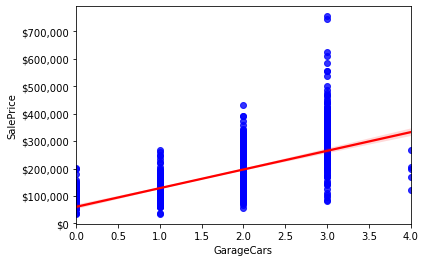

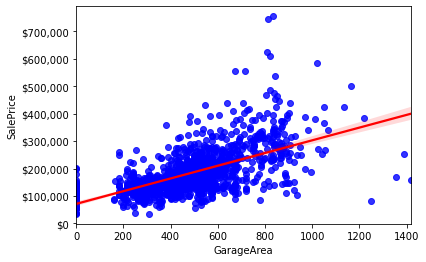

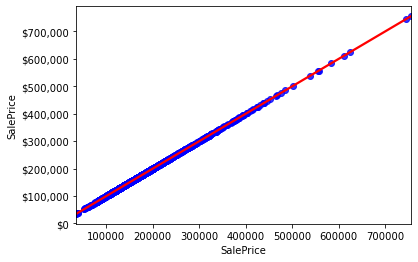

In [16]:
listreg = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] 

# On fait une figure par colonne 
for col in listreg:
    plt.figure()
    ax = sns.regplot(x=col, y="SalePrice", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    # on change le format de l'axe y
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 

### Affichage du jointplot

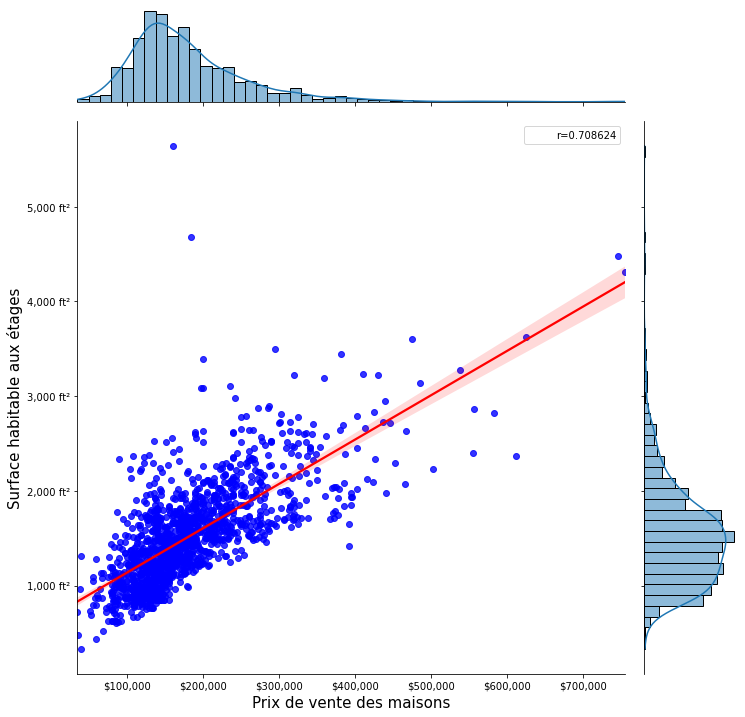

In [17]:
# On setup les dataframe
x=df['SalePrice']
y=df['GrLivArea']

ax = sns.jointplot(x = x, y = y, kind="reg", fit_reg = True, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, height=10);

# On calcule le coefficient de pearson
r = stats.pearsonr(x, y)[0]
# if you choose to write your own legend, then you should adjust the properties then
phantom, = ax.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
ax.ax_joint.legend([phantom],['r={:f}'.format(r)]);

# On modifie les noms des axes pour les rendre plus compréhensibles
plt.xlabel("Prix de vente des maisons", fontsize=15)
plt.ylabel("Surface habitable aux étages", fontsize=15)

# on change le format de l'axe x
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.ax_joint.xaxis.set_major_formatter(tick) 


# on change le format de l'axe y
fmt = '{x:,.0f} ft²'
tick = mtick.StrMethodFormatter(fmt)
ax.ax_joint.yaxis.set_major_formatter(tick) 

On voit que la corrélation entre le SalePrice et le GrLivArea est forte et que cette corrélation est linéaire. Le salaire et la superficie des étages est donc fortement correlée. 
On peut voir que les deux variables ont des densités proches et que ça se traduit par un nuage de point proche centré sur la ligne de régression linéaire. 

## Etude des valeurs qualitatives

### Identification des colonnes contenant les valeurs qualitatives

In [18]:
# On créé un dataframe contenant uniquement les valeurs qualitatives (donc les object)
dfquali=df.select_dtypes(include=[object])

### Utilisation de countplot

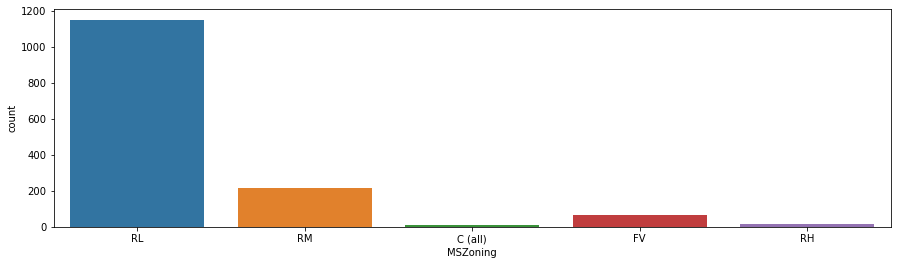

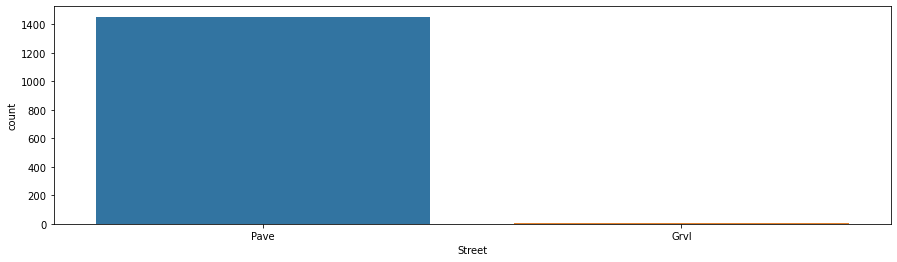

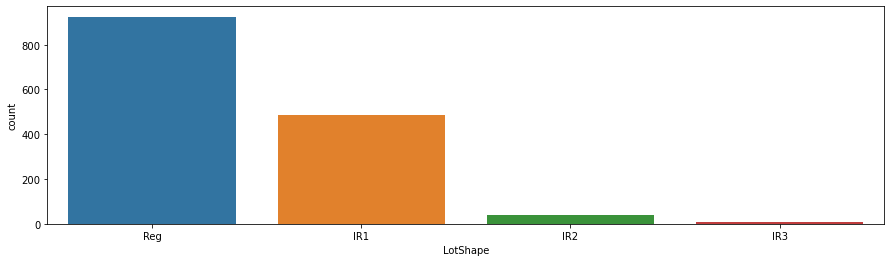

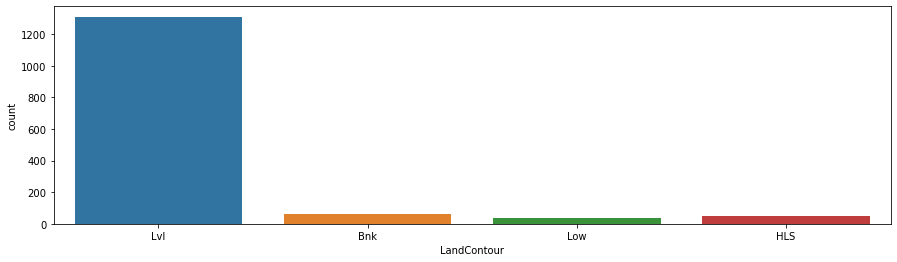

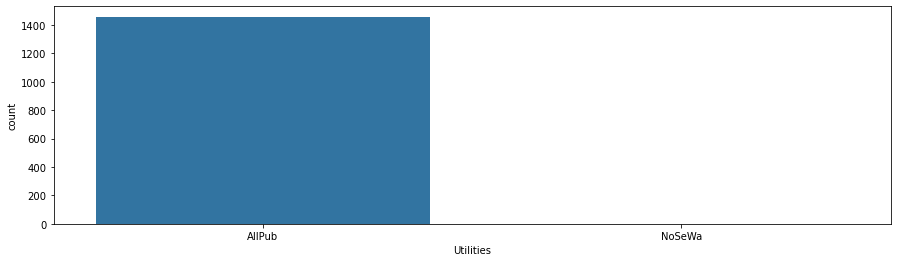

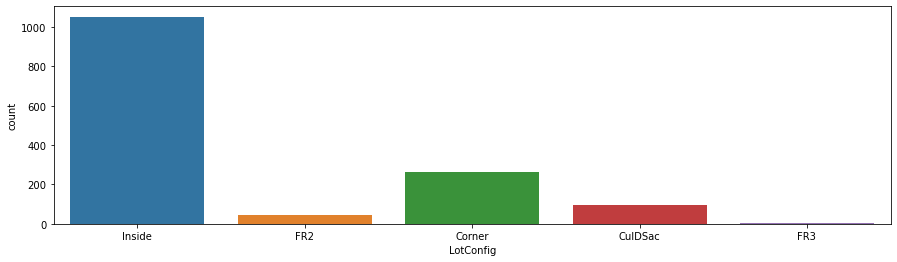

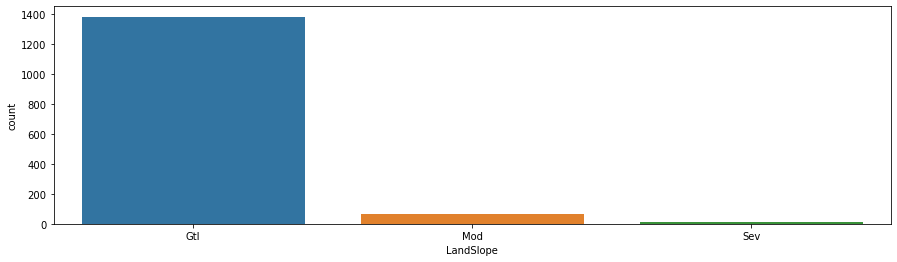

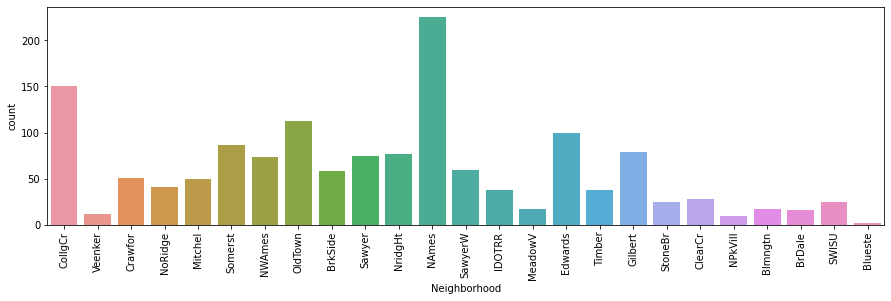

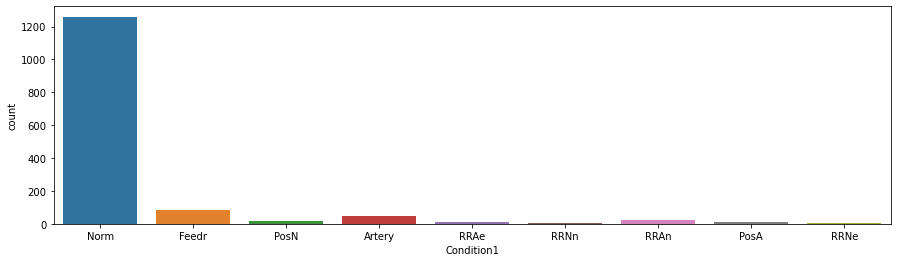

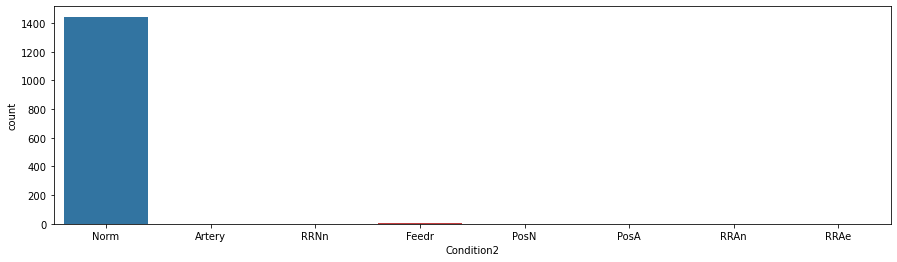

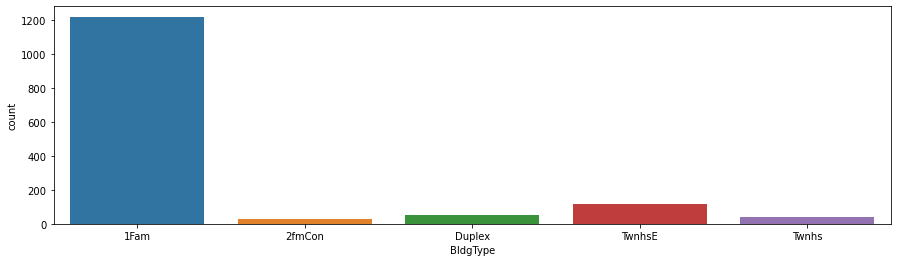

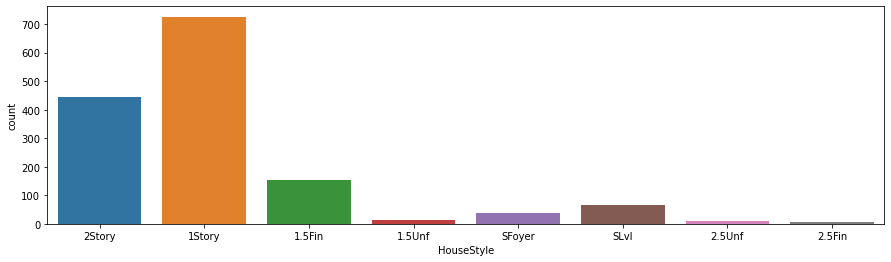

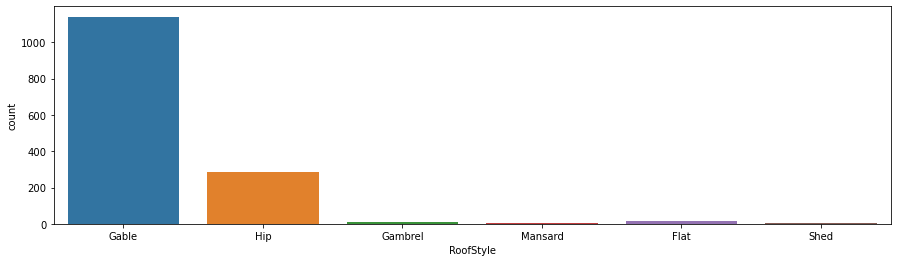

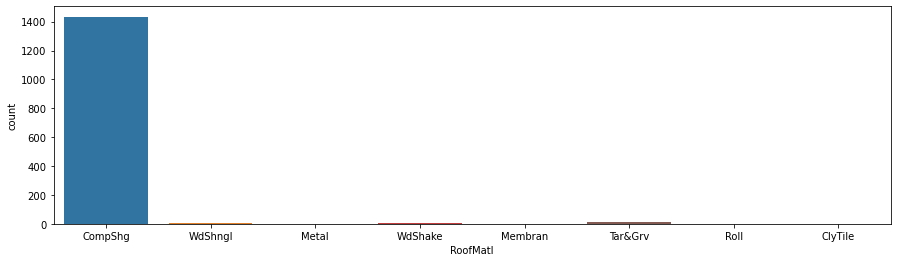

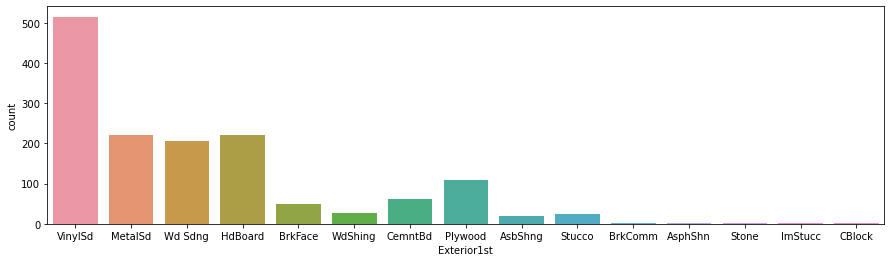

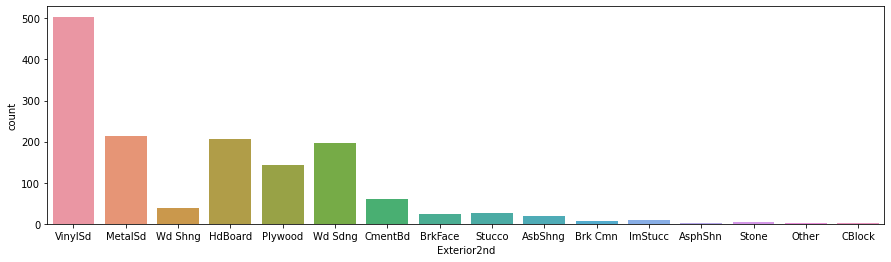

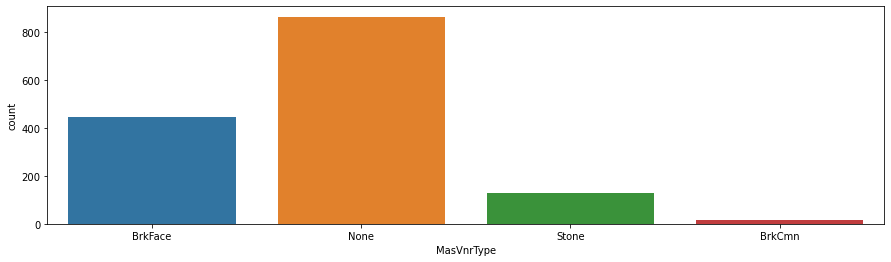

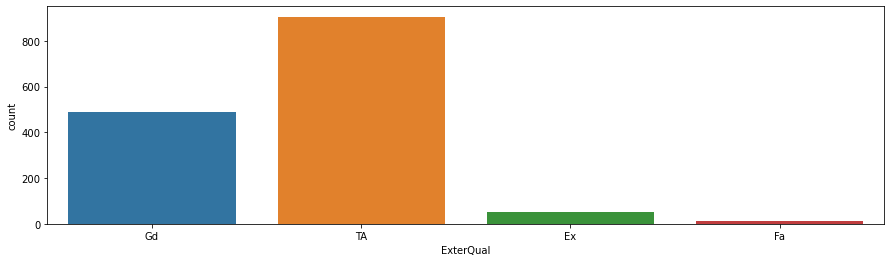

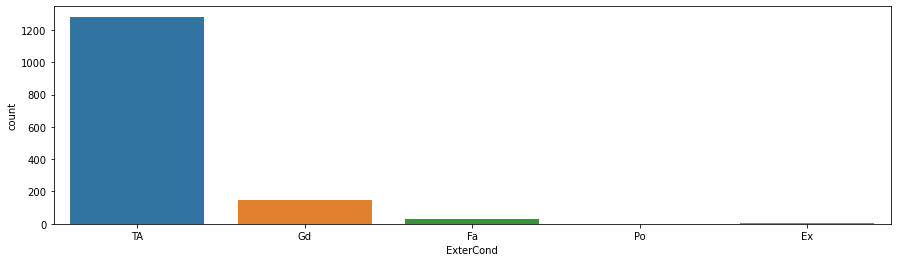

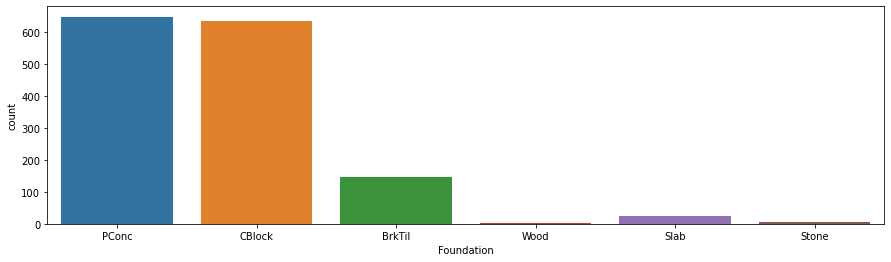

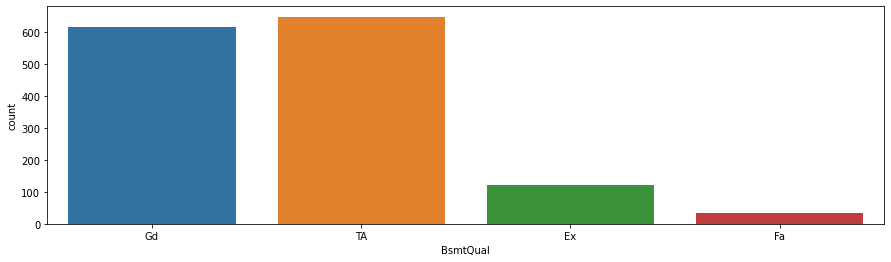

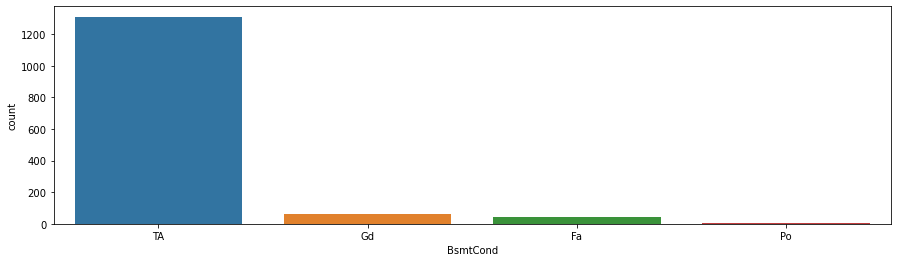

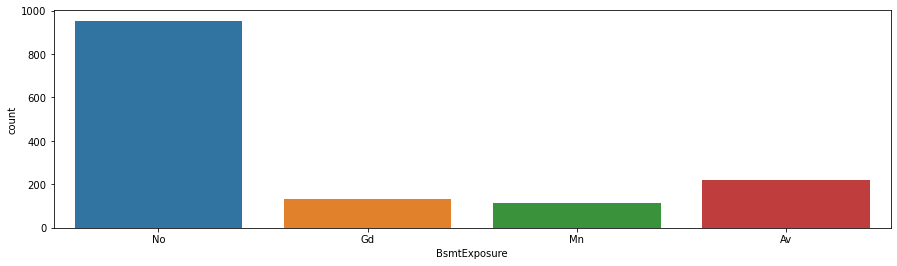

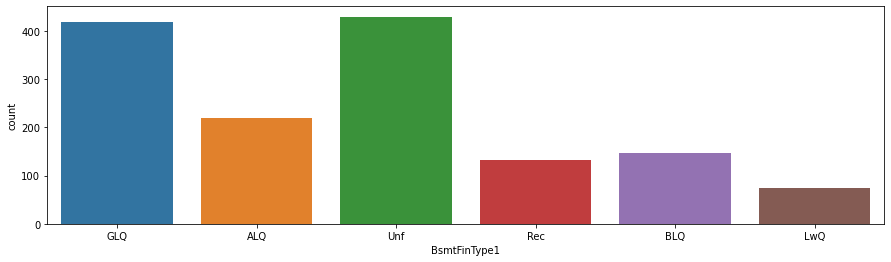

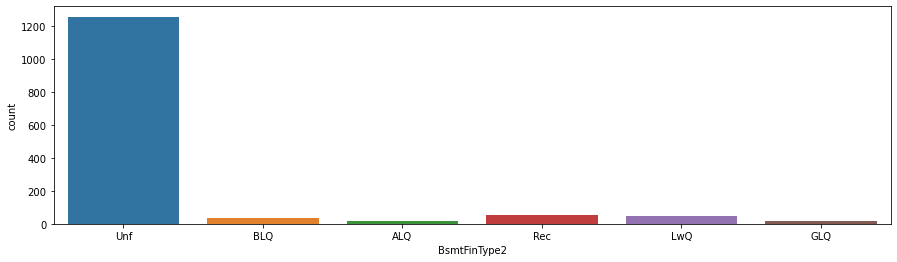

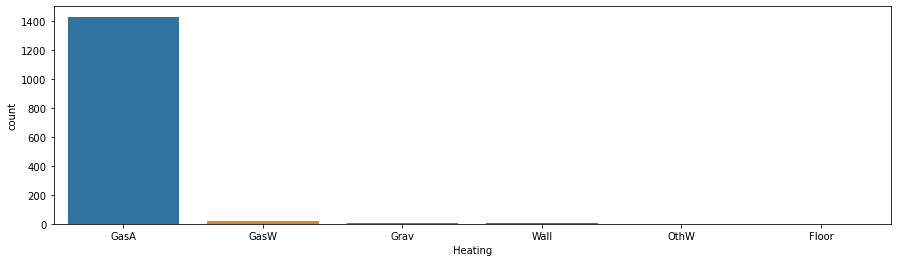

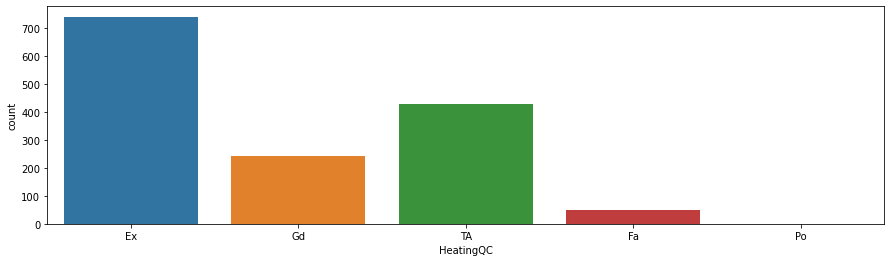

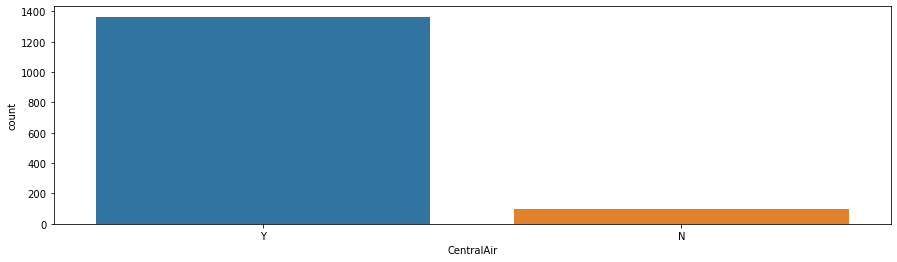

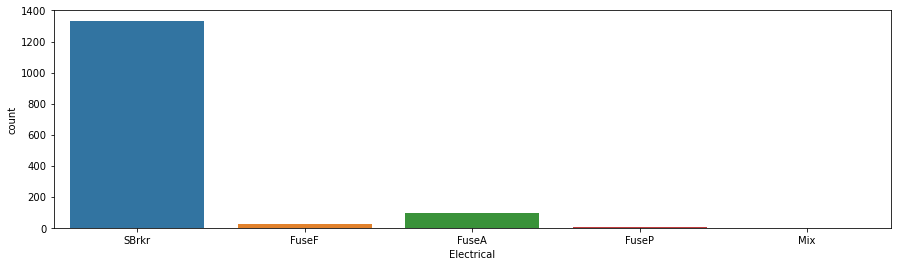

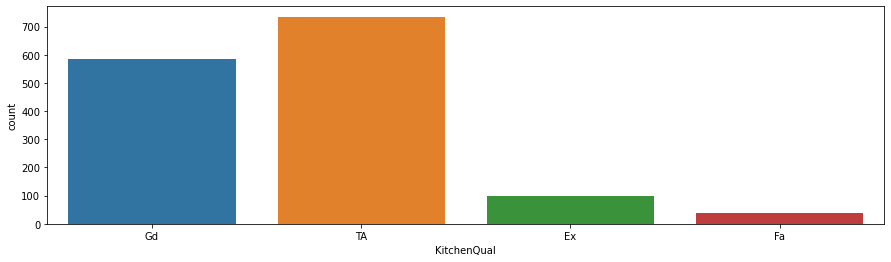

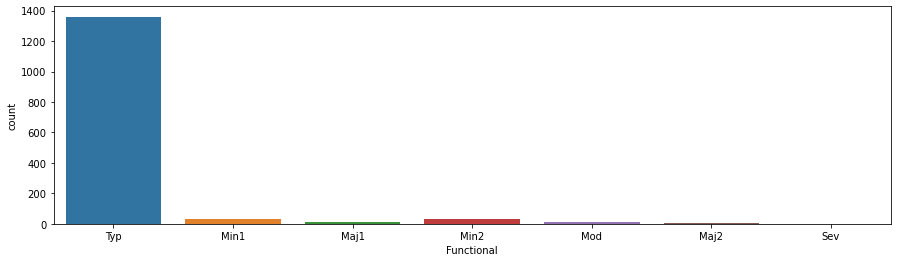

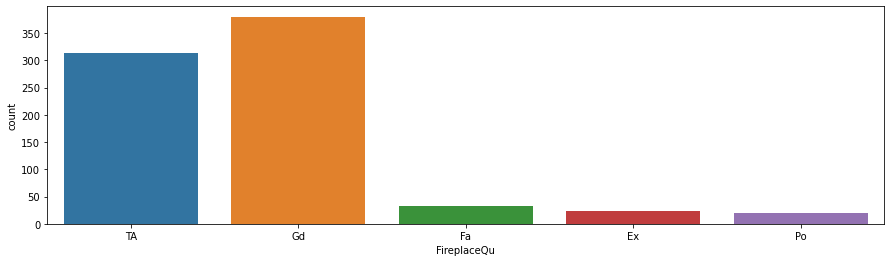

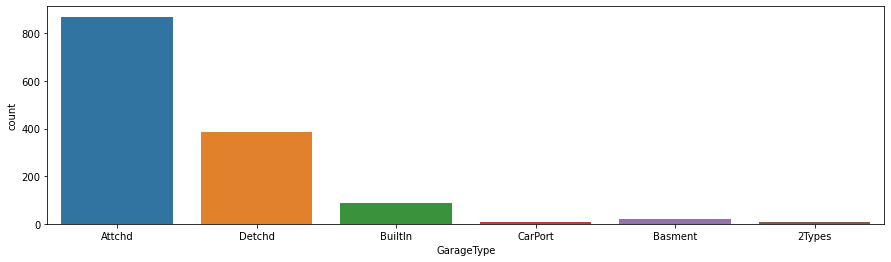

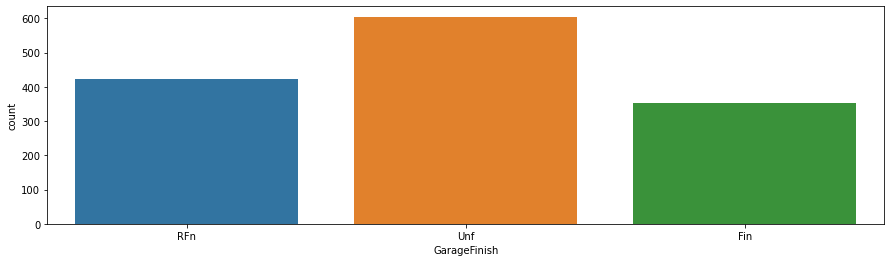

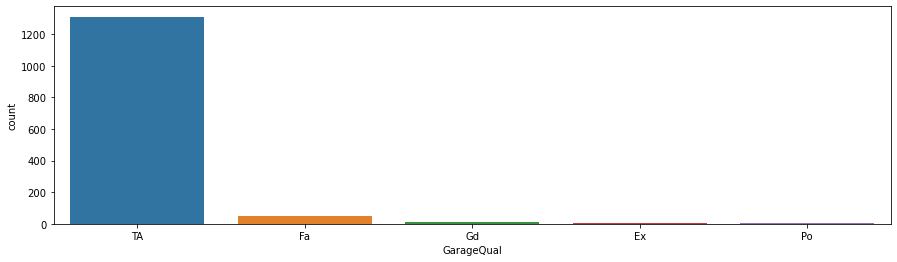

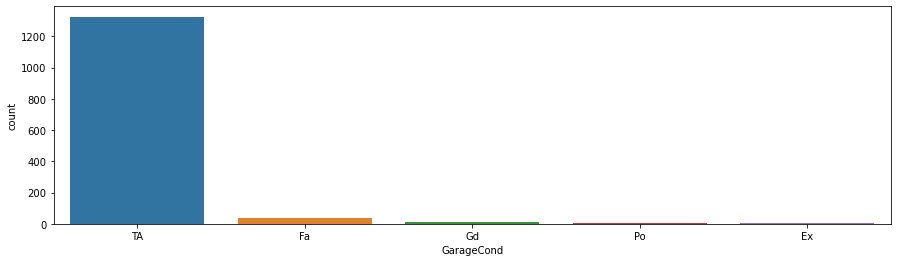

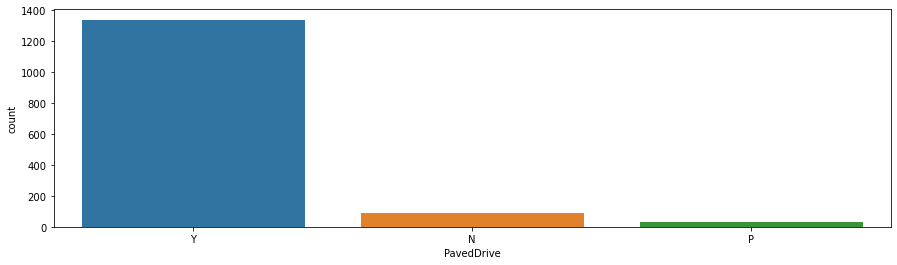

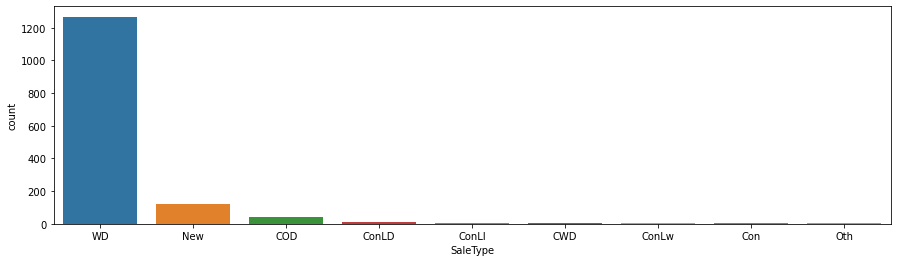

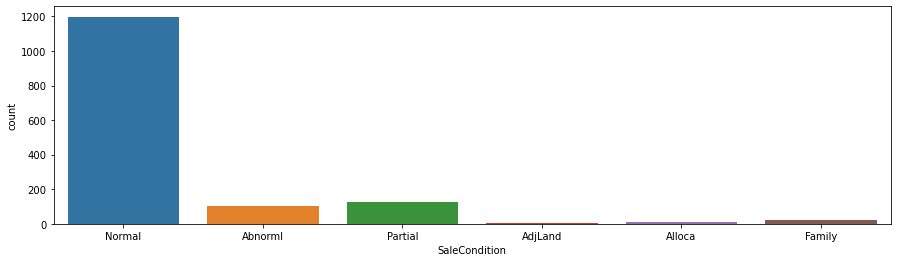

In [19]:
for col in dfquali.columns:
    plt.figure(figsize=(15,4))
    sns.countplot(x=df[col])
    if col == 'Neighborhood':
        plt.xticks(rotation=90)
    # Display the plot
    plt.show()
    # Close the current plot to stop retaining memory
    plt.close()
        

On a le nombre d'occurences de chaque valeurs pour chaque colonne. On peut voir quelle valeur est la plus représentée et dans quelle proportion, ce qui peut nous permettre de voir quelles sont les valeurs les plus pertinentes pour expliquer la différence entre les prix des maisons.

### Détermination des variables inutiles

Des variables telles que 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond' et 'PavedDrive' ne paraissent pas pertinentes pour expliquer le prix d'une maison. En effet, plus de 90% des maisons vendues ont la même valeur pour ces attributs. Ces attributs ne permettront donc pas de déterminer un lien entre le prix de la maison et eux. On va déterminer quelles colonnes sont dans cette situation où la valeur principale représente plus de 90% des occurences. 

In [20]:
linutile = []

# On parcourt nos colonnes de valeurs qualitatives
for col in dfquali.columns:
    # On extrait le nombre d'occurences maximal de la colonne
    max = df[col].value_counts()[0]
    # On prélève la colonne si la même valeur est retrouvée plus de 90% du temps
    if max/len(df) > 0.9:
        linutile.append(col)
        
print("Les colonnes qui ont plus de 90% de la même occurence sont :\n{}".format(linutile)) 

Les colonnes qui ont plus de 90% de la même occurence sont :
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


### Machine learning : régression linéaire

In [21]:
# Données pour faire les expériences
X = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']]
# Donnée à déterminer
y = df["SalePrice"]

# On entraine notre algorithme
reg = LinearRegression().fit(X, y)

In [22]:
# On créé un nombre aléatoire pour conserver le même sample tant qu'on le souhaite
r=rd.randint(0, 1000)

In [23]:
print(df[['SalePrice', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']].sample(10, random_state=r))
print("Making predictions for the following 5 houses:")
print(X.sample(10, random_state=r))
print("The predictions are")
print(reg.predict(X.sample(10, random_state=r)))

      SalePrice  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
317      270000         1088      1088       871       1959         2   
838      144000         1099      1099         0       1099         1   
1010     135000          720       720       551       1271         2   
214      161750          689       689       703       1392         1   
490      115000          264       616       688       1304         1   
437      119000          884       904         0        904         1   
41       170000         1350      1328         0       1328         1   
1384     105000          560       698       560       1258         1   
1080     145000         1258      1258         0       1258         2   
574      139000          372       576       533       1109         1   

      TotRmsAbvGrd  GarageCars  
317              8           3  
838              6           1  
1010             7           1  
214              6           1  
490              4           1 